# Modelos Tradicionais (Baseline)

In [4]:
# Importar bibliotecas necessárias
# pip install pmdarima scikit-learn matplotlib pandas
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pmdarima'

In [50]:
# Abrir o ficheiro com ; como separador
df = pd.read_csv('datasets/consumo_eredes_limpo1.csv', sep=',')

# 📆 Aplicar ARIMA a uma série horaria para o codigo postal 2840 (Seixal)

In [59]:
# Filtrar apenas os dados do código postal 2840
df_2840 = df[df['Zip Code'] == '2840'].copy()

# Criar a série temporal horária
serie_horaria_2840 = df_2840.set_index('Datetime')['Energy_Normalized']

# ⚙️ Aplicar ARIMA

In [60]:
modelo_arima = auto_arima(
    serie_horaria_2840,
    seasonal=True,     # Podes tentar com m=24 (1 dia de ciclo) ou m=168 (1 semana)
    m=24,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=11.11 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=72.099, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-1847.635, Time=4.40 sec


MemoryError: Unable to allocate 7.55 MiB for an array with shape (26, 26, 1464) and data type float64

In [25]:
# Previsão para as próximas 24 horas
n_periods = 24
previsoes = modelo_arima.predict(n_periods=n_periods)

# Criar datas futuras para previsões
datas_futuras = pd.date_range(start=serie_horaria_2840.index[-1] + pd.Timedelta(hours=1), periods=n_periods, freq='H')
df_previsao = pd.DataFrame({'Data': datas_futuras, 'Previsao': previsoes})

# 📊 Visualizar resultados

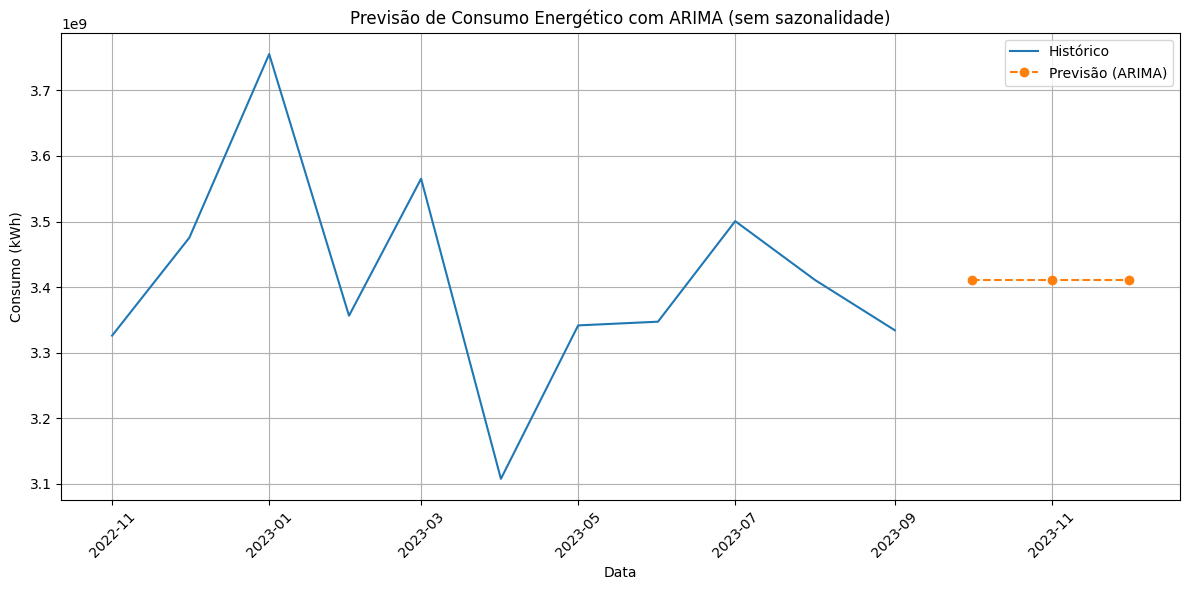

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(serie_horaria_2840[-168:], label='Últimos 7 dias (histórico)')
plt.plot(df_previsao['Data'], df_previsao['Previsao'], label='Previsão (ARIMA)', linestyle='--', marker='o')
plt.title('Previsão de Consumo Energético (horária)')
plt.xlabel('Data')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📏 Avaliar o modelo com metricas

In [27]:
real = serie_horaria_2840[-24:].values # comparar as 24 últimas horas reais

# Só executa esta comparação se tens as 24 horas reais disponíveis!
if len(real) == len(previsoes):
    mae = mean_absolute_error(real, previsoes)
    rmse = mean_squared_error(real, previsoes, squared=False)
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f}")
else:
    print("⚠️ Não há dados reais suficientes para comparar com as previsões.")

print(modelo_arima.summary())
df_previsao.to_csv('predicts/arima_cp2840.csv', index=False)

MAE: 55493563.46 | RMSE: 68102529.60


C:\Users\alice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
